# Rough estimations
Following plots are based on calculations made from properties of the code/s without considering the inside of the code. In other words we are taking the basic properties of how many errors the code is guaranteed to correct/detect and plotting accordingly.

In [35]:
# Reimport necessary libraries and re-define previous code due to environment reset
import numpy as np
import math
import matplotlib.pyplot as plt

# Values of Eta (transmittance) from 0 to 1
eta_values = np.linspace(0, 1, 1000)

# Define the Tesseract code parameters
total_qubits = 16  # Physical qubits

# Function to calculate the probability of successful transmission for at least given required qubit count out of total qubits
def prob_successful_transmission(eta, min_qubits, total_qubits):
    return sum([eta**k * (1 - eta)**(total_qubits - k) * np.math.comb(total_qubits, k) for k in range(min_qubits, total_qubits + 1)])

# Calculates the probability that exactly exact_qubits are transmitted without error
def prob_successful_transmission_exactly(eta, exact_qubits, total_qubits):
    return eta**exact_qubits * (1 - eta)**(total_qubits - exact_qubits) * np.math.comb(total_qubits, exact_qubits)

def complementary(input_array):
    return [1 - x for x in input_array]

def calculate_elementary_link_generation_probability(eta_c, L0, Latt):
    """
    Calculate the probability of successful generation of an elementary link.
    Based on the formula from Comparing One- and Two-way Quantum Repeater Architectures http://arxiv.org/abs/2409.06152 (Appendix A)

    Parameters:
    - eta_c (float): Coupling efficiency (0 < eta_c <= 1).
    - L0 (float): Inter-repeater distance in kilometers (km).
    - Latt (float): Attenuation length in kilometers (km), typically 20 km.

    Returns:
    - float: Probability of successful link generation.
    """
    # Ensure inputs are valid
    if not (0 <= eta_c <= 1):
        raise ValueError("Coupling efficiency eta_c must be between 0 and 1.")
    if L0 < 0 or Latt <= 0:
        raise ValueError("Distances L0 and Latt must be positive.")

    # Calculate probability
    probability = 0.5 * (eta_c ** 2) * math.exp(-L0 / Latt)
    return probability

## Assuming non-heralded errors (warm-up):
Following plot is based on the reference from https://www.nature.com/articles/s41534-023-00775-9 Fig.3
Here we plot probability of successfully transmitting an encoded qubit with the [[16,4,4]] tesseract code. It can correct 1 error, and detect an additional error, so we consider success at the probability of having no more than 1 error, divided by the prob. of non-detection.
Currently commenting this out as it might confuse (later graphs should be more meaningful

In [2]:
# Probability of successful correction (0 or 1 qubit lost)
correction_prob = [prob_successful_transmission(eta, total_qubits - 1, total_qubits) for eta in eta_values]

# Probability of detection (exactly 2 qubits lost)
detection_prob = [prob_successful_transmission(eta, total_qubits - 2, total_qubits) - prob_successful_transmission(eta, total_qubits - 1, total_qubits) for eta in eta_values]

# Logical erasure probability: failure to correct or detect (3+ qubits lost)
logical_erasure_prob = [1 - (c + d) for c, d in zip(correction_prob, detection_prob)] # TODO verify calculation if we end up using this data

# Define the loss rate as (1 - eta), and calculate the logical erasure probability
loss_rate_values = 1 - eta_values  # X-axis (rate of qubits lost)

# # Set up the logarithmic scale for the Y-axis
# plt.figure(figsize=(8, 6))
# plt.yscale('log')
# plt.ylim(1e-3, 1)  # Logical erasure probability between 10^-3 and 1
# plt.xlim(0.01,0.6)
#
# # Plot the logical erasure probability
# plt.plot(loss_rate_values, logical_erasure_prob, label="Logical Error Probability", color='blue', linewidth=2)
#
# # Add a dashed black line for the direct transmission error probability (x = y)
# plt.plot(loss_rate_values, loss_rate_values, label="Direct Transmission Error (x=y)", color='black', linestyle='--')
#
# # Add labels, title, and legend
# plt.xlabel('Loss Rate (1 - Eta)')
# plt.ylabel('Logical Error Probability (log scale)')
# plt.title('Logical Error Probability vs. Loss Rate')
# plt.grid(True, which="both", linestyle='--', linewidth=0.5)
# plt.legend()
# plt.show()


/var/folders/jp/lgs0t4n56r13bf0qknykv3sc0000gn/T/ipykernel_43095/3226757966.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return sum([eta**k * (1 - eta)**(total_qubits - k) * np.math.comb(total_qubits, k) for k in range(min_qubits, total_qubits + 1)])


## Logical erasure prob.
Calculating the logical erasure probability. This probably resambles Fig. 3 in https://www.nature.com/articles/s41534-023-00775-9.
Here we calculate the prob that we have less than 4 errors, as 3 or less erasure errors are correctable.

/var/folders/jp/lgs0t4n56r13bf0qknykv3sc0000gn/T/ipykernel_43095/3226757966.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return sum([eta**k * (1 - eta)**(total_qubits - k) * np.math.comb(total_qubits, k) for k in range(min_qubits, total_qubits + 1)])


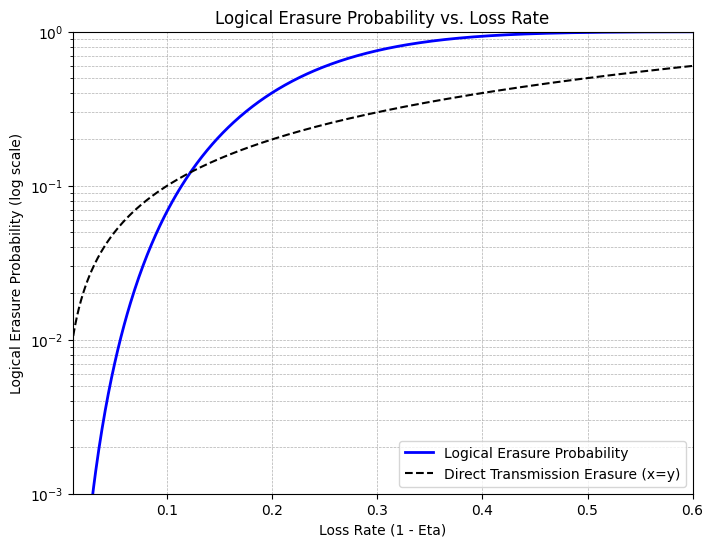

In [3]:
# Probability of successfully trasmitting enough qubits such that they can be corrected assuming we only have erasure errors
erasure_channel_success_prob = [prob_successful_transmission(eta, total_qubits - 3, total_qubits) for eta in eta_values]

logical_erasure_prob2 = complementary(erasure_channel_success_prob)

# Set up the logarithmic scale for the Y-axis
plt.figure(figsize=(8, 6))
plt.yscale('log')
plt.ylim(1e-3, 1)  # Logical erasure probability between 10^-3 and 1
plt.xlim(0.01,0.6)

# Plot the logical erasure probability
plt.plot(loss_rate_values, logical_erasure_prob2, label="Logical Erasure Probability", color='blue', linewidth=2)

# Add a dashed black line for the direct transmission error probability (x = y)
plt.plot(loss_rate_values, loss_rate_values, label="Direct Transmission Erasure (x=y)", color='black', linestyle='--')

# Add labels, title, and legend
plt.xlabel('Loss Rate (1 - Eta)')
plt.ylabel('Logical Erasure Probability (log scale)')
plt.title('Logical Erasure Probability vs. Loss Rate')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

## Comparison between the $[[16,6,4]]$-code and the $[[16,4,4]]$ tesseract subsystem color code
In order to show the difference, we need some measure of rate. This is because both codes have the same distance and therefore same probabilities of fail/abort.
For now, I'm commenting out this code since it is incorrect

In [27]:
# # Probability of successfully trasmitting enough qubits such that they can be corrected assuming we only have erasure errors
# logical_erasure_prob_16_6_4 = complementary(
#     [prob_successful_transmission(eta, total_qubits - 5, total_qubits) for eta in eta_values])
#
# # Set up the logarithmic scale for the Y-axis
# plt.figure(figsize=(8, 6))
# plt.yscale('log')
# plt.ylim(1e-3, 1)  # Logical erasure probability between 10^-3 and 1
# plt.xlim(0.01,0.6)
#
# # Plot the logical erasure probability
# plt.plot(loss_rate_values, logical_erasure_prob2, label="Logical Erasure Probability [[16,4,4]] subsystem code", color='blue', linewidth=2)
# plt.plot(loss_rate_values, logical_erasure_prob_16_6_4, label="Logical Erasure Probability [[16,6,4]] code", linewidth=2)
#
# # Add a dashed black line for the direct transmission error probability (x = y)
# plt.plot(loss_rate_values, loss_rate_values, label="Direct Transmission Erasure (x=y)", color='black', linestyle='--')
#
# # Add labels, title, and legend
# plt.xlabel('Loss Rate (1 - Eta)')
# plt.ylabel('Logical Erasure Probability (log scale)')
# plt.title('Logical Erasure Probability vs. Loss Rate')
# plt.grid(True, which="both", linestyle='--', linewidth=0.5)
# plt.legend()
# plt.show()

### Plot with log scale on both X and Y axis.
Reference: Entanglement Routing using Quantum Error Correction for Distillation http://arxiv.org/abs/2405.00849 Fig.1

/var/folders/jp/lgs0t4n56r13bf0qknykv3sc0000gn/T/ipykernel_43095/4285452725.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return sum([eta**k * (1 - eta)**(total_qubits - k) * np.math.comb(total_qubits, k) for k in range(min_qubits, total_qubits + 1)])


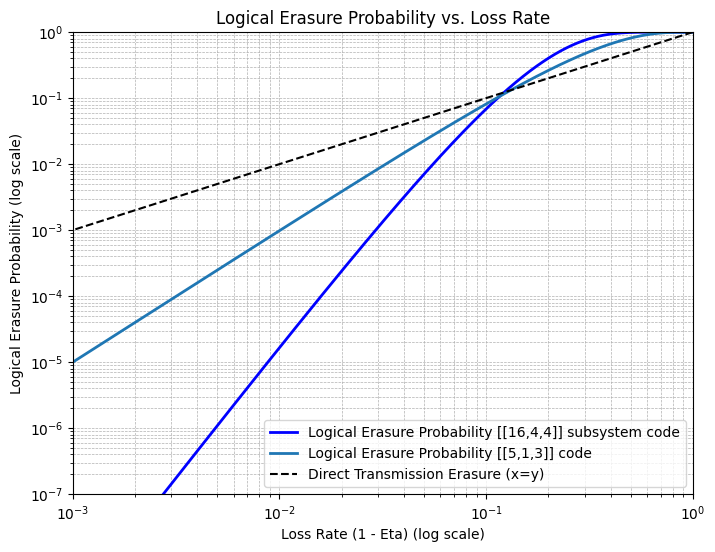

In [29]:
# reference codes for verification:
# erasure_channel_success_prob_3_1_3 = [prob_successful_transmission(eta, 2, 3) for eta in eta_values]
#
# logical_erasure_prob_3_1_3 = [1 - x for x in erasure_channel_success_prob_3_1_3]

erasure_channel_success_prob_5_1_3 = [prob_successful_transmission(eta, 4, 5) for eta in eta_values]

logical_erasure_prob_5_1_3 = [1 - x for x in erasure_channel_success_prob_5_1_3]

# Set up the logarithmic scale for the Y-axis
plt.figure(figsize=(8, 6))
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-7, 1)  # Logical erasure probability between 10^-3 and 1
plt.xlim(0.001,1)

# Plot the logical erasure probability
plt.plot(loss_rate_values, logical_erasure_prob2, label="Logical Erasure Probability [[16,4,4]] subsystem code", color='blue', linewidth=2)
# plt.plot(loss_rate_values, logical_erasure_prob_16_6_4, label="Logical Erasure Probability [[16,6,4]] code", linewidth=2)
plt.plot(loss_rate_values, logical_erasure_prob_5_1_3, label="Logical Erasure Probability [[5,1,3]] code", linewidth=2)
# plt.plot(loss_rate_values, logical_erasure_prob_3_1_3, label="Logical Erasure Probability [[3,1,3]] code", linewidth=2)

# Add a dashed black line for the direct transmission error probability (x = y)
plt.plot(loss_rate_values, loss_rate_values, label="Direct Transmission Erasure (x=y)", color='black', linestyle='--')

# Add labels, title, and legend
plt.xlabel('Loss Rate (1 - Eta) (log scale)')
plt.ylabel('Logical Erasure Probability (log scale)')
plt.title('Logical Erasure Probability vs. Loss Rate')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

## Handling depolarizing errors
Here we don't assume the errors are erasure errors, but that they are some depolarizing errors. Similar to the model in http://arxiv.org/abs/2405.00849 where EPR pairs are treated as Werner states after passing through the channel.


Why does the 3,1,3 plot not resamble the one from the paper? should we take rate into account in this plot somehow?

/var/folders/jp/lgs0t4n56r13bf0qknykv3sc0000gn/T/ipykernel_43095/4285452725.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return sum([eta**k * (1 - eta)**(total_qubits - k) * np.math.comb(total_qubits, k) for k in range(min_qubits, total_qubits + 1)])
/var/folders/jp/lgs0t4n56r13bf0qknykv3sc0000gn/T/ipykernel_43095/4285452725.py:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return eta**exact_qubits * (1 - eta)**(total_qubits - exact_qubits) * np.math.comb(total_qubits, exact_qubits)


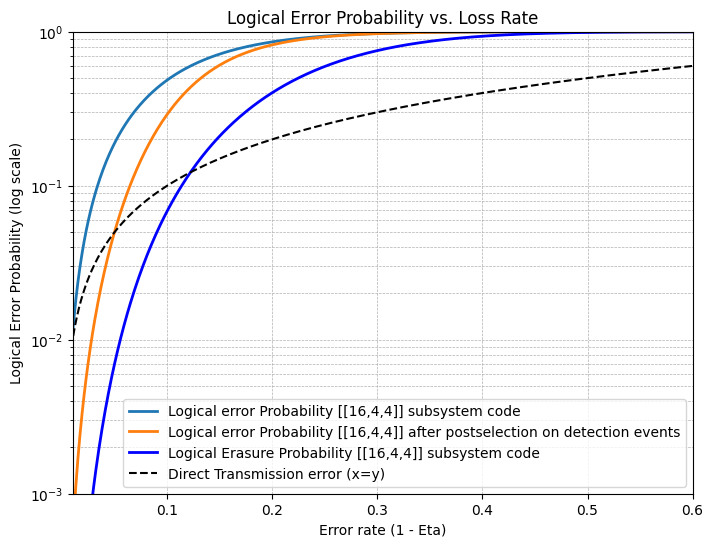

In [31]:
# Probability of successfully trasmitting enough qubits such that they can be corrected
logical_error_prob_16_4_4 = complementary([prob_successful_transmission(eta, total_qubits-1, total_qubits) for eta in eta_values])

# Probability of successful transmission of enough qubits to be able to correct CONDITIONED on NO-detection event
logical_error_prob_16_4_4_with_postselection =complementary([prob_successful_transmission(eta, total_qubits-1, total_qubits) / (1-prob_successful_transmission_exactly(eta, total_qubits-2,total_qubits)) for eta in eta_values])

# Set up the logarithmic scale for the Y-axis
plt.figure(figsize=(8, 6))
plt.yscale('log')
plt.ylim(1e-3, 1)  # Logical erasure probability between 10^-3 and 1
plt.xlim(0.01,0.6)

# Plot the logical erasure probability
plt.plot(loss_rate_values, logical_error_prob_16_4_4, label="Logical error Probability [[16,4,4]] subsystem code", linewidth=2)
plt.plot(loss_rate_values, logical_error_prob_16_4_4_with_postselection, label="Logical error Probability [[16,4,4]] after postselection on detection events", linewidth=2)
plt.plot(loss_rate_values, logical_erasure_prob2, label="Logical Erasure Probability [[16,4,4]] subsystem code", color='blue', linewidth=2)

# Add a dashed black line for the direct transmission error probability (x = y)
plt.plot(loss_rate_values, loss_rate_values, label="Direct Transmission error (x=y)", color='black', linestyle='--')

# Add labels, title, and legend
plt.xlabel('Error rate (1 - Eta)')
plt.ylabel('Logical Error Probability (log scale)')
plt.title('Logical Error Probability vs. Loss Rate')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

## Plot for multiple segments of repeaters:

/var/folders/jp/lgs0t4n56r13bf0qknykv3sc0000gn/T/ipykernel_43095/4285452725.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return sum([eta**k * (1 - eta)**(total_qubits - k) * np.math.comb(total_qubits, k) for k in range(min_qubits, total_qubits + 1)])


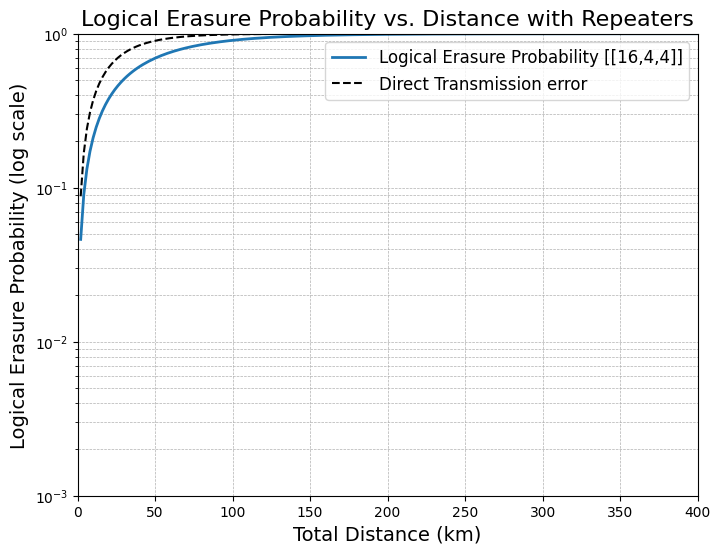

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
loss_rate_dB_per_km = 0.2  # dB per km
segment_length = 2  # km
total_distance = np.arange(2, 400 + 1, 2)  # Total distance from 50 to 1000 km in steps of 50

# Functions
def loss_rate_to_eta(distance, loss_rate_dB_per_km):
    """Convert distance (km) to transmission probability (eta)."""
    loss_dB = loss_rate_dB_per_km * distance
    eta = 10 ** (-loss_dB / 10)
    return eta

# Data Calculation
segment_eta_values = []

segment_distance = segment_length
eta_segment = loss_rate_to_eta(segment_distance, loss_rate_dB_per_km)
segment_eta_values.append(eta_segment)


def get_error_probs_for_segments(transmission_probs):
    logical_erasure_probabilities = []
    for d in total_distance:
        num_segments = d // segment_length

        seg_success_prob = transmission_probs
        end_to_end_success_prob = seg_success_prob ** num_segments
        logical_erasure_prob = 1 - end_to_end_success_prob
        logical_erasure_probabilities.append(logical_erasure_prob)
    return logical_erasure_probabilities


# Assuming a [[16,4,4]] code with required transmission success on 13 qubits
logical_erasure_prob_segments_16_4_4 = get_error_probs_for_segments(
    prob_successful_transmission(eta_segment, total_qubits - 3, total_qubits))

direct_transmission = get_error_probs_for_segments(
    prob_successful_transmission(eta_segment, 1, 1))

# Plot
plt.figure(figsize=(8, 6))
plt.yscale('log')
plt.ylim(1e-3, 1)  # Logical erasure probability range
plt.xlim(0, 400)  # Distance range

# Logical erasure probability vs. distance
plt.plot(total_distance, logical_erasure_prob_segments_16_4_4, label="Logical Erasure Probability [[16,4,4]]", linewidth=2)

plt.plot(total_distance, direct_transmission, label="Direct Transmission error", color='black', linestyle='--')


# Add labels, title, and legend
plt.xlabel('Total Distance (km)', fontsize=14)
plt.ylabel('Logical Erasure Probability (log scale)', fontsize=14)
plt.title('Logical Erasure Probability vs. Distance with Repeaters', fontsize=16)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()


In [17]:
erasure_channel_success_prob

[0.0,
 5.657506886987217e-37,
 4.6217061567049185e-33,
 8.96963714682264e-31,
 3.764987228019078e-29,
 6.829322327101157e-28,
 7.286460577928234e-27,
 5.390220960607103e-26,
 3.049877770640779e-25,
 1.4061920917772286e-24,
 5.5165850827861584e-24,
 1.8991199035106437e-23,
 5.869210661644926e-23,
 1.6567690051085923e-22,
 4.329488456842435e-22,
 1.0585980460419848e-21,
 2.442732708762015e-21,
 5.357009996570831e-21,
 1.1230476967860016e-20,
 2.2616242508151508e-20,
 4.393194535517782e-20,
 8.260512981265938e-20,
 1.5080494224151693e-19,
 2.6800689645051006e-19,
 4.647211720834976e-19,
 7.878208676180412e-19,
 1.3080392479826227e-18,
 2.130369330765323e-18,
 3.408300822220878e-18,
 5.363074824012149e-18,
 8.309433013942848e-18,
 1.2689693089867977e-17,
 1.911840493811292e-17,
 2.84403419314823e-17,
 4.180516961710659e-17,
 6.076282146717403e-17,
 8.738441104089607e-17,
 1.2441443565981682e-16,
 1.7546109351035887e-16,
 2.452327601530386e-16,
 3.398300692014465e-16,
 4.671046342212068e-16